# Theory

1. What is a Support Vector Machine (SVM)?
   - SVM is a supervised learning algorithm that finds the hyperplane that best separates data into classes with maximum margin.

2. What is the difference between Hard Margin and Soft Margin SVM?
   - Hard Margin requires perfect separation, Soft Margin allows some misclassification to handle noisy or non-linearly separable data.

3. What is the mathematical intuition behind SVM?
   - SVM optimizes a margin-maximizing objective function with constraints. It aims to maximize the distance between support vectors and the decision boundary.

4. What is the role of Lagrange Multipliers in SVM?
   - Lagrange Multipliers convert the constrained optimization problem of SVM into a dual problem, enabling the use of kernels and simplifying the optimization.

5. What are Support Vectors in SVM?
   - Support Vectors are data points closest to the separating hyperplane. They influence the position and orientation of the hyperplane.

6. What is a Support Vector Classifier (SVC)?
   - SVC is the implementation of SVM for classification tasks.

7. What is a Support Vector Regressor (SVR)?
   - SVR applies the SVM principle to regression, trying to fit data within a specified error margin.

8. What is the Kernel Trick in SVM?
   - The kernel trick allows SVM to operate in a high-dimensional space without explicitly transforming data, using functions like RBF or polynomial kernels.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel:
   - Linear: Fast and works well for linearly separable data.
   - Polynomial: Captures non-linear patterns via polynomial combinations.
   - RBF: Captures complex relationships by considering distance between points.

10. What is the effect of the C parameter in SVM?
   - C controls the trade-off between margin width and classification error. A smaller C allows a wider margin with more misclassifications.

11. What is the role of the Gamma parameter in RBF Kernel SVM?
   - Gamma defines the influence of a single training example. Low gamma = far influence, high gamma = close influence.

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
   - It applies Bayes’ Theorem with the assumption that features are conditionally independent, which is often not true, hence "naïve."

13. What is Bayes’ Theorem?
   - P(A|B) = (P(B|A) * P(A)) / P(B)

14. Explain the differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes:
   - Gaussian: For continuous features assuming normal distribution.
   - Multinomial: For count features like word counts.
   - Bernoulli: For binary/boolean features.

15. When should you use Gaussian Naïve Bayes over other variants?
   - When features are continuous and normally distributed.

16. What are the key assumptions made by Naïve Bayes?
   - Features are independent given the class, and each feature contributes equally to prediction.

17. What are the advantages and disadvantages of Naïve Bayes?
   - Advantages: Simple, fast, works well with high-dimensional data.
   - Disadvantages: Assumption of independence rarely holds true.

18. Why is Naïve Bayes a good choice for text classification?
   - Text data fits the independence assumption well and results in high accuracy.

19. Compare SVM and Naïve Bayes for classification tasks:
   - SVM: Powerful for complex boundaries, slower.
   - Naïve Bayes: Faster, works well with high-dimensional sparse data.

20. How does Laplace Smoothing help in Naïve Bayes?
   - It avoids zero probabilities for unseen feature-class combinations by adding 1 to counts (also called additive smoothing).


# Practical

In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import load_wine, load_breast_cancer, load_diabetes, fetch_openml, make_classification, load_iris, fetch_california_housing, fetch_20newsgroups
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, roc_auc_score, mean_absolute_error,
    precision_recall_curve, average_precision_score,
    classification_report, mean_squared_error,
)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier


In [61]:
# Question 21: Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [62]:
# Question 22: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
clf_linear = SVC(kernel='linear')
clf_rbf    = SVC(kernel='rbf')
clf_linear.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)
acc_lin = accuracy_score(y_test, clf_linear.predict(X_test))
acc_rbf = accuracy_score(y_test, clf_rbf.predict(X_test))
print(f"Linear kernel accuracy: {acc_lin:.2f}")
print(f"RBF kernel accuracy:    {acc_rbf:.2f}")


Linear kernel accuracy: 1.00
RBF kernel accuracy:    0.81


In [63]:
# Question 23: Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3320115421348744


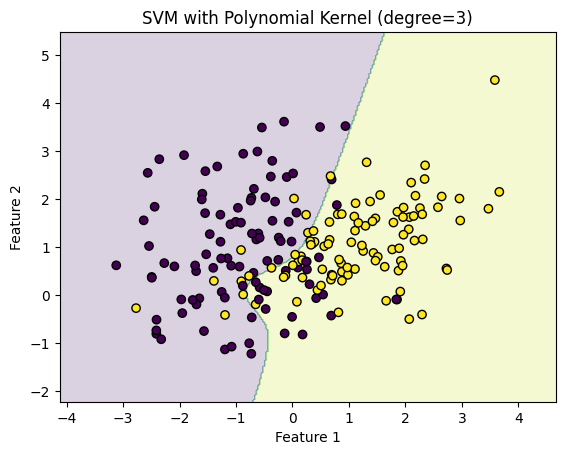

In [64]:
# Question 24: Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.
# We'll use a 2D synthetic dataset for clear plotting.
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42,
                           n_clusters_per_class=1)
clf_poly = SVC(kernel='poly', degree=3)
clf_poly.fit(X, y)

# Decision boundary grid
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)
Z = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [65]:
# Question 25: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


In [66]:
# Question 26: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

news_train = fetch_20newsgroups(
    subset='train',
    remove=('headers','footers','quotes')
)
news_test = fetch_20newsgroups(
    subset='test',
    remove=('headers','footers','quotes')
)
vectorizer = CountVectorizer(stop_words='english', max_df=0.5)
X_train = vectorizer.fit_transform(news_train.data)
X_test  = vectorizer.transform(news_test.data)

mnb = MultinomialNB()
mnb.fit(X_train, news_train.target)
y_pred = mnb.predict(X_test)
print("Accuracy:", accuracy_score(news_test.target, y_pred))

Accuracy: 0.6343600637280935


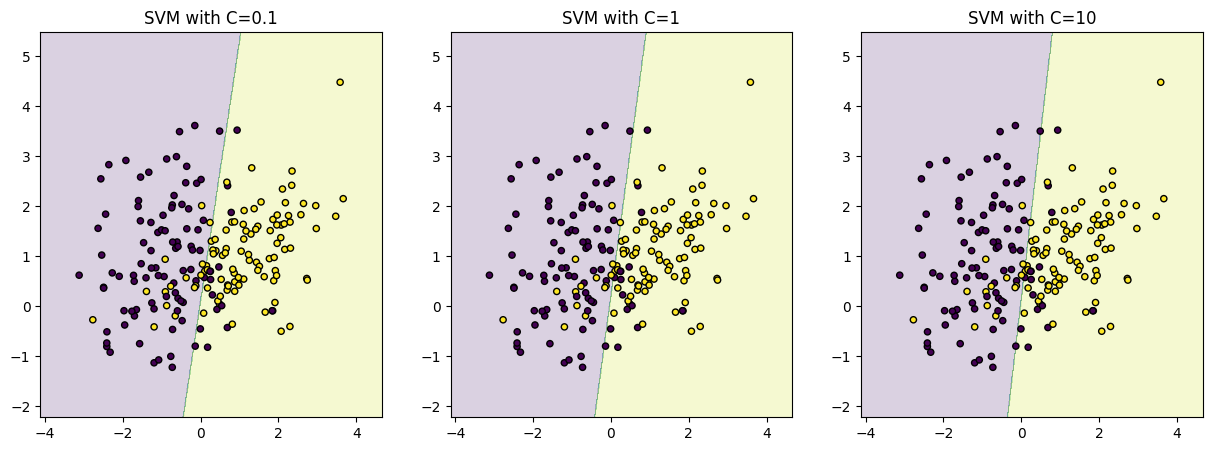

In [67]:
# Question 27: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42, n_clusters_per_class=1)
C_values = [0.1, 1, 10]
fig, axes = plt.subplots(1, len(C_values), figsize=(15,5))
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
)
for ax, C in zip(axes, C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
    ax.set_title(f'SVM with C={C}')
plt.show()


In [68]:
# Question 28: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
X, y = make_classification(n_samples=200, n_features=10, n_informative=5,
                           n_redundant=0, random_state=42)
# binarize features
X = (X > np.median(X, axis=0)).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6


In [69]:
# Question 29: Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data
iris = datasets.load_iris()
mask = iris.target != 2
X, y = iris.data[mask], iris.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
# Unscaled
clf_unscaled = SVC(kernel='rbf', random_state=42)
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))
# Scaled
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)
clf_scaled = SVC(kernel='rbf', random_state=42)
clf_scaled.fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_s))
print(f"Accuracy without scaling: {acc_unscaled:.2f}")
print(f"Accuracy with scaling:    {acc_scaled:.2f}")


Accuracy without scaling: 1.00
Accuracy with scaling:    1.00


In [70]:
# Question 30: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing
iris = datasets.load_iris()
mask = iris.target != 2
X, y = iris.data[mask], iris.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
# default smoothing
gnb_def = GaussianNB()
gnb_def.fit(X_train, y_train)
acc_def = accuracy_score(y_test, gnb_def.predict(X_test))
# increased var_smoothing
gnb_sm = GaussianNB(var_smoothing=1e-2)
gnb_sm.fit(X_train, y_train)
acc_sm = accuracy_score(y_test, gnb_sm.predict(X_test))
print(f"Accuracy without smoothing: {acc_def:.2f}")
print(f"Accuracy with smoothing:    {acc_sm:.2f}")


Accuracy without smoothing: 1.00
Accuracy with smoothing:    1.00


In [71]:
# Question 31: Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Test accuracy:", accuracy_score(y_test, grid.predict(X_test)))


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy: 1.0


In [72]:
# Question 32: Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=0, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
# without weighting
clf_unw = SVC()
clf_unw.fit(X_train, y_train)
print("Without class weighting:\n", classification_report(y_test, clf_unw.predict(X_test)))
# with weighting
clf_w = SVC(class_weight='balanced')
clf_w.fit(X_train, y_train)
print("With class weighting:\n", classification_report(y_test, clf_w.predict(X_test)))


Without class weighting:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       175
           1       1.00      0.28      0.44        25

    accuracy                           0.91       200
   macro avg       0.95      0.64      0.69       200
weighted avg       0.92      0.91      0.89       200

With class weighting:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       175
           1       0.67      0.56      0.61        25

    accuracy                           0.91       200
   macro avg       0.80      0.76      0.78       200
weighted avg       0.90      0.91      0.91       200



In [73]:
# Question 33: Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
spam = fetch_openml('spambase', version=1, as_frame=False)
X, y = spam.data, spam.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8208469055374593
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



In [74]:
# Question 34: Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
svm_clf = SVC()
nb_clf  = GaussianNB()
svm_clf.fit(X_train, y_train)
nb_clf.fit(X_train, y_train)
print(f"SVM Accuracy:       {accuracy_score(y_test, svm_clf.predict(X_test)):.2f}")
print(f"Naive Bayes Accuracy:{accuracy_score(y_test, nb_clf.predict(X_test)):.2f}")


SVM Accuracy:       1.00
Naive Bayes Accuracy:1.00


In [75]:
# Question 35: Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
# without selection
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_full = accuracy_score(y_test, nb.predict(X_test))
# with SelectKBest
selector = SelectKBest(chi2, k=2)
X_train_k = selector.fit_transform(X_train, y_train)
X_test_k  = selector.transform(X_test)
nb2 = GaussianNB()
nb2.fit(X_train_k, y_train)
acc_sel = accuracy_score(y_test, nb2.predict(X_test_k))
print(f"All features accuracy:      {acc_full:.2f}")
print(f"Selected features accuracy: {acc_sel:.2f}")


All features accuracy:      1.00
Selected features accuracy: 1.00


In [76]:
# Question 36: Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())
ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)
print(f"OvR Accuracy:{accuracy_score(y_test, ovr.predict(X_test)):.2f}")
print(f"OvO Accuracy:{accuracy_score(y_test, ovo.predict(X_test)):.2f}")


OvR Accuracy:0.78
OvO Accuracy:0.83


In [77]:
# Question 37: Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
for kernel in ['linear','poly','rbf']:
    clf = SVC(kernel=kernel, degree=3 if kernel=='poly' else 3)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Kernel={kernel:6s} → Accuracy={acc:.2f}")


Kernel=linear → Accuracy=0.96
Kernel=poly   → Accuracy=0.95
Kernel=rbf    → Accuracy=0.95


In [78]:
# Question 38: Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy
iris = datasets.load_iris()
X, y = iris.data, iris.target
skf = StratifiedKFold(n_splits=5)
scores = []
for tr, te in skf.split(X, y):
    clf = SVC()
    clf.fit(X[tr], y[tr])
    scores.append(accuracy_score(y[te], clf.predict(X[te])))
print(f"Average accuracy: {np.mean(scores):.2f}")


Average accuracy: 0.97


In [79]:
# Question 39: Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance
iris = datasets.load_iris()
mask = iris.target != 2
X, y = iris.data[mask], iris.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
for priors in [None, [0.5,0.5], [0.7,0.3]]:
    gnb = GaussianNB(priors=priors)
    gnb.fit(X_train, y_train)
    print(f"Priors={priors} → Acc={accuracy_score(y_test, gnb.predict(X_test)):.2f}")


Priors=None → Acc=1.00
Priors=[0.5, 0.5] → Acc=1.00
Priors=[0.7, 0.3] → Acc=1.00


In [80]:
# Question 40: Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf_all = SVC(kernel='linear').fit(X_train, y_train)
acc_all = accuracy_score(y_test, clf_all.predict(X_test))
rfe = RFE(SVC(kernel='linear'), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_tr5 = rfe.transform(X_train); X_te5 = rfe.transform(X_test)
clf5 = SVC(kernel='linear').fit(X_tr5, y_train)
acc5 = accuracy_score(y_test, clf5.predict(X_te5))
print(f"All features acc: {acc_all:.2f}")
print(f"RFE-selected acc: {acc5:.2f}")


All features acc: 1.00
RFE-selected acc: 0.97


In [81]:
# Question 41: Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy
iris = datasets.load_iris()
mask = iris.target != 2
X, y = iris.data[mask], iris.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))


Precision: 1.0
Recall:    1.0
F1-Score:  1.0


In [82]:
# Question 42: Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)
iris = datasets.load_iris()
mask = iris.target != 2
X, y = iris.data[mask], iris.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf = GaussianNB().fit(X_train, y_train)
proba = clf.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, proba))


Log Loss: 1.803557303503877e-14


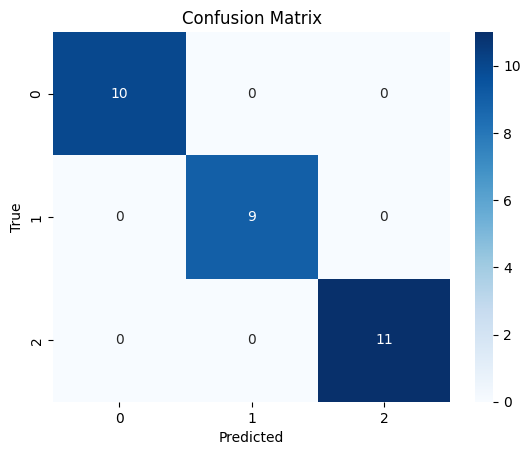

In [83]:
# Question 43: Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf = SVC().fit(X_train, y_train)
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.show()


In [84]:
# Question 44: Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE
diab = load_diabetes()
X, y = diab.data, diab.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
svr = SVR().fit(X_train, y_train)
print("Mean Absolute Error:", mean_absolute_error(y_test, svr.predict(X_test)))


Mean Absolute Error: 56.02372412801096


In [85]:
# Question 45: Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score
iris = datasets.load_iris()
mask = iris.target != 2
X, y = iris.data[mask], iris.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf = GaussianNB().fit(X_train, y_train)
proba = clf.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, proba))


ROC-AUC Score: 1.0


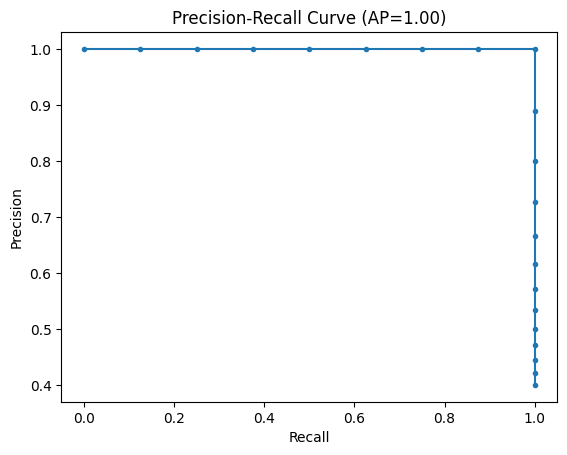

In [86]:
# Question 46: Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
iris = datasets.load_iris()
mask = iris.target != 2
X, y = iris.data[mask], iris.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
clf = SVC(probability=True).fit(X_train, y_train)
proba = clf.predict_proba(X_test)[:,1]
prec, rec, _ = precision_recall_curve(y_test, proba)
ap = average_precision_score(y_test, proba)
plt.plot(rec, prec, marker='.')
plt.title(f'Precision-Recall Curve (AP={ap:.2f})')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()
